In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from openbb import obb
from sklearn.decomposition import PCA

In [2]:
obb.user.preferences.output_type = "dataframe"

In [3]:
def get_cryoto_data(symbol, start_date=None, end_date=None):
    data = obb.crypto.price.historical(symbol=symbol, interval='1h', start_date='2024-01-01', end_date='2024-12-31', provider='yfinance')
    data["symbol"] = symbol
    return data

In [4]:
get_cryoto_data('BTC-USD').pivot(columns="symbol", values="close")

symbol,BTC-USD
date,
2024-01-01 00:00:00,42477.253906
2024-01-01 01:00:00,42622.898438
2024-01-01 02:00:00,42576.601562
2024-01-01 03:00:00,42320.730469
2024-01-01 04:00:00,42387.164062
...,...
2024-09-13 13:00:00,58122.230469
2024-09-13 14:00:00,58404.339844
2024-09-13 15:00:00,59621.039062


In [5]:
symbols = ["BTC-USD", "ETH-USD", "ADA-USD", "ALGO-USD", "LINK-USD", "XRP-USD", "BNB-USD", "SOL-USD"]

In [6]:
df_list = []

for sy in symbols:
    dat = get_cryoto_data(sy)
    df_list.append(dat)

In [7]:
df_list

[                             open          high           low         close  \
 date                                                                          
 2024-01-01 00:00:00  42280.234375  42517.601562  42277.726562  42477.253906   
 2024-01-01 01:00:00  42471.402344  42718.710938  42433.785156  42622.898438   
 2024-01-01 02:00:00  42611.335938  42611.335938  42506.359375  42576.601562   
 2024-01-01 03:00:00  42575.968750  42581.007812  42270.757812  42320.730469   
 2024-01-01 04:00:00  42325.042969  42387.164062  42227.984375  42387.164062   
 ...                           ...           ...           ...           ...   
 2024-09-13 13:00:00  57914.546875  58122.230469  57709.156250  58122.230469   
 2024-09-13 14:00:00  58061.285156  58434.023438  57920.335938  58404.339844   
 2024-09-13 15:00:00  58465.460938  59712.277344  58404.507812  59621.039062   
 2024-09-13 16:00:00  59674.445312  59778.175781  59338.382812  59476.136719   
 2024-09-13 17:00:00  59459.261719  5966

In [8]:
final_df = pd.concat(df_list)

final_df = final_df.pivot(columns="symbol", values="close")

In [9]:
returns = final_df.pct_change().dropna()


/var/folders/l8/wvmkld_n55xc9w_c94f4zj8c0000gn/T/ipykernel_97643/200623945.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = final_df.pct_change().dropna()


In [10]:
returns

symbol,ADA-USD,ALGO-USD,BNB-USD,BTC-USD,ETH-USD,LINK-USD,SOL-USD,XRP-USD
date,,,,,,,,
2024-01-01 01:00:00,0.008091,0.005014,0.002376,0.003429,0.003345,0.002511,0.020032,0.004299
2024-01-01 02:00:00,-0.004789,-0.006973,-0.011109,-0.001086,-0.004040,-0.005268,-0.002018,-0.004331
2024-01-01 03:00:00,-0.005650,-0.008644,-0.007194,-0.006010,-0.008916,-0.010556,-0.010417,-0.004233
2024-01-01 04:00:00,-0.002901,-0.003886,-0.000850,0.001570,0.002325,-0.002629,-0.004428,-0.002631
2024-01-01 05:00:00,-0.002979,-0.002620,-0.001357,-0.003814,-0.001666,0.004976,-0.006861,-0.002862
...,...,...,...,...,...,...,...,...
2024-09-13 13:00:00,0.003748,0.006980,0.006496,0.003327,0.001266,-0.006974,0.002150,-0.000459
2024-09-13 14:00:00,0.005437,0.004324,-0.005058,0.004854,0.003237,0.005881,0.007135,-0.000577
2024-09-13 15:00:00,0.022567,0.023273,0.007658,0.020832,0.017180,0.020957,0.021790,0.004022


In [11]:
pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

In [12]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

In [13]:
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct) + 1, 1)

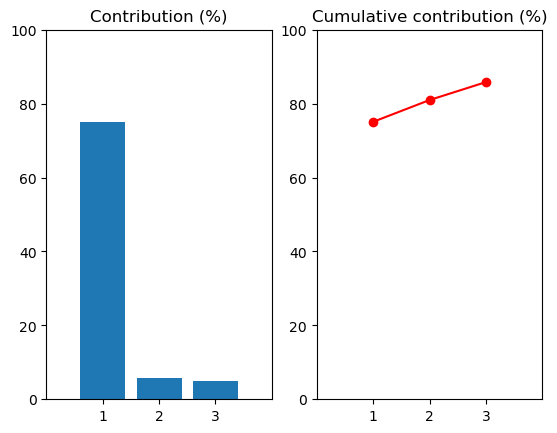

In [14]:
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title("Contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, "ro-")
plt.title("Cumulative contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.show()

In [15]:
X = np.asarray(returns)
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], index=returns.index, data=factor_returns
)

In [16]:
display(factor_returns)


,f1,f2,f3
date,,,
2024-01-01 01:00:00,0.019111,0.009992,-0.003044
2024-01-01 02:00:00,-0.013552,0.003400,-0.000788
2024-01-01 03:00:00,-0.022020,-0.002511,-0.000104
2024-01-01 04:00:00,-0.005825,0.000473,-0.001359
2024-01-01 05:00:00,-0.006066,-0.003741,0.002451
...,...,...,...
2024-09-13 13:00:00,0.005502,0.001288,0.002927
2024-09-13 14:00:00,0.010116,0.003284,0.002263
2024-09-13 15:00:00,0.050174,0.005162,0.006594


In [17]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], columns=returns.columns, data=pca_components
).T

In [18]:
display(factor_exposures)

,f1,f2,f3
symbol,,,
ADA-USD,0.386172,-0.237837,0.025206
ALGO-USD,0.438267,-0.219776,0.718590
BNB-USD,0.265971,0.036649,-0.098239
BTC-USD,0.235652,0.147181,-0.176131
ETH-USD,0.291205,0.083908,-0.149767
LINK-USD,0.391252,-0.148689,0.103482
SOL-USD,0.455387,0.741210,-0.154978
XRP-USD,0.295407,-0.541836,-0.620615


<Axes: xlabel='symbol'>

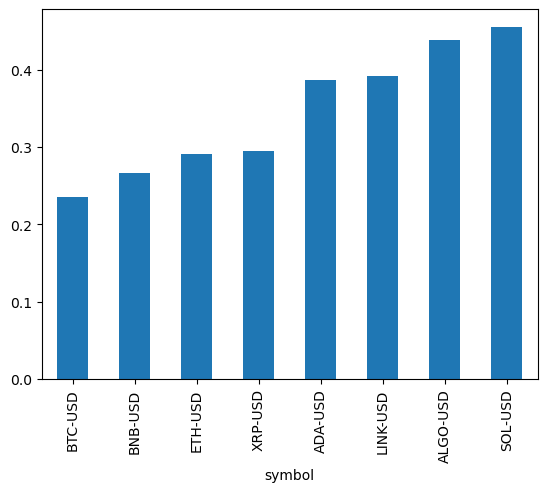

In [19]:
factor_exposures.f1.sort_values().plot.bar()


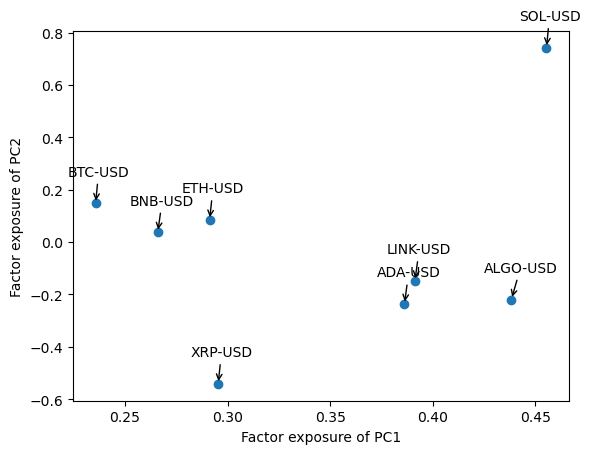

In [20]:
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Factor exposure of PC1")
plt.ylabel("Factor exposure of PC2")

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )

plt.show()